In [1]:
pip install kaggle

In [2]:
import kaggle

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('D:\Bharat Intern\CAT VS DOG\Cat-and-Dog-Image-Classifier-main\dogs-vs-cats.zip', 'r')
zip_ref.extractall('D:\Bharat Intern\CAT VS DOG\Cat-and-Dog-Image-Classifier-main')
zip_ref.close()

In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D, Flatten,BatchNormalization,Dropout

In [8]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = "D:\\Bharat Intern\\CAT VS DOG\\Cat-and-Dog-Image-Classifier-main\\dogs_vs_cats\\test",
    labels= 'inferred',
    label_mode = 'int',
    batch_size= 32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "D:\\Bharat Intern\\CAT VS DOG\\Cat-and-Dog-Image-Classifier-main\\dogs_vs_cats\\train",
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size =(256,256)
)

Found 5000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [9]:
#Normalize

def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
# create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid' ,activation = 'relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides =2, padding='valid'))

model.add(Flatten())

model.add(Dense (128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [12]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [13]:
history= model.fit(train_ds,epochs=10, validation_data=validation_ds)

Epoch 1/10


157/157 [==============================] - 366s 2s/step - loss: 2.9108 - accuracy: 0.5440 - val_loss: 3.8264 - val_accuracy: 0.5030
Epoch 2/10
157/157 [==============================] - 372s 2s/step - loss: 1.0336 - accuracy: 0.5644 - val_loss: 1.7927 - val_accuracy: 0.5403
Epoch 3/10
157/157 [==============================] - 444s 3s/step - loss: 0.6961 - accuracy: 0.5984 - val_loss: 0.7198 - val_accuracy: 0.5768
Epoch 4/10
157/157 [==============================] - 484s 3s/step - loss: 0.6623 - accuracy: 0.6422 - val_loss: 0.6793 - val_accuracy: 0.5586
Epoch 5/10
157/157 [==============================] - 490s 3s/step - loss: 0.5957 - accuracy: 0.6842 - val_loss: 0.6342 - val_accuracy: 0.6737
Epoch 6/10
157/157 [==============================] - 475s 3s/step - loss: 0.5268 - accuracy: 0.7272 - val_loss: 0.5851 - val_accuracy: 0.7038
Epoch 7/10
157/157 [==============================] - 359s 2s/step - loss: 0.4539 - accuracy: 0.7836 - val_loss: 0.5566 - val_accuracy: 0.72

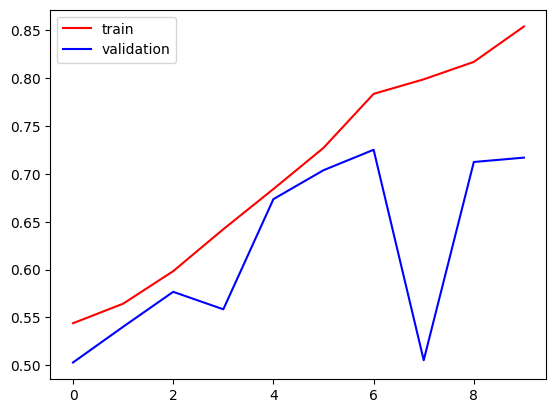

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()

plt.show()

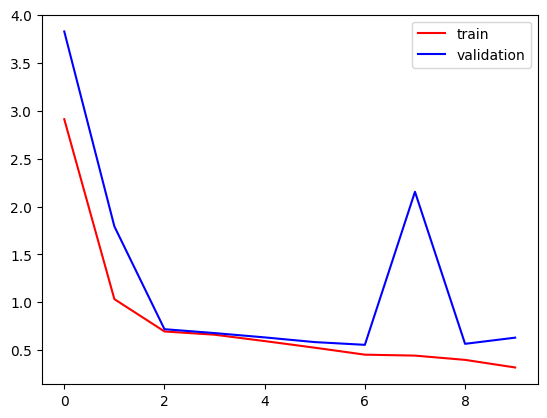

In [15]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()